<a href="https://colab.research.google.com/github/cesarodrigo21/Ejercicios-algoritmo-paralelo-y-distribuidos-2020-2/blob/main/Arbol_Decision_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Árbol de Decisión
```
Alumno     : Cesar Rodrigo Ttito Quilca
Codigo     : 14098


RETO: Obtenga la curva ROC para cada caso

```

#1. Librería

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree

# Librerías para métricas
import sklearn.metrics as metrics

# Librerías para Árbol de decisión
from sklearn.tree import DecisionTreeClassifier

##Leer datos

In [ ]:
datosWine = pd.read_csv("CreditoBancario.csv", sep=',')
datosWine.head()

,sexo,educacion,estadocivil,edad,montocredito
0,2,2,1,24,20000
1,2,2,2,26,120000
2,2,2,2,34,90000
3,2,2,1,37,50000
4,1,2,1,57,50000


##Descripcion de datos

In [ ]:
print(datosWine.describe())

            sexo  educacion  estadocivil       edad   montocredito
count  14.000000  14.000000    14.000000  14.000000      14.000000
mean    1.642857   2.000000     1.714286  34.714286  164285.714286
std     0.497245   0.679366     0.468807   9.769880  184378.969505
min     1.000000   1.000000     1.000000  23.000000   20000.000000
25%     1.000000   2.000000     1.250000  28.250000   50000.000000
50%     2.000000   2.000000     2.000000  34.000000   95000.000000
75%     2.000000   2.000000     2.000000  37.000000  185000.000000
max     2.000000   3.000000     2.000000  57.000000  630000.000000


##Histograma

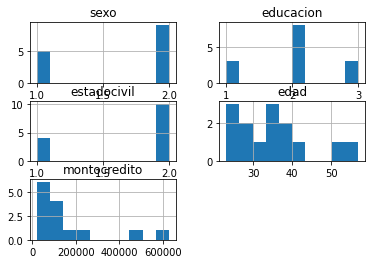

In [ ]:
datosWine.hist()
plt.show()

##Distribucion de clases

In [ ]:
print(datosWine.groupby('sexo').size())

sexo
1    5
2    9
dtype: int64


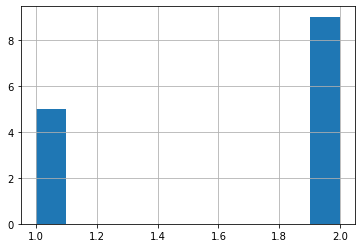

In [ ]:
datosWine['sexo'].hist()
plt.show()

##Separacion de datos, para entrenamiento y test

In [ ]:
X = datosWine[datosWine.keys()[0:5]].values
y = datosWine['montocredito'].values

# Separa datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Normalizar
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test, y_train, y_test

(array([[1.        , 0.5       , 1.        , 0.61111111, 0.1147541 ],
        [0.        , 0.5       , 1.        , 0.38888889, 0.08196721],
        [0.        , 1.        , 1.        , 0.66666667, 0.        ],
        [1.        , 0.5       , 1.        , 0.16666667, 0.16393443],
        [1.        , 0.5       , 1.        , 0.        , 0.13114754],
        [1.        , 1.        , 1.        , 0.61111111, 0.29508197],
        [1.        , 0.5       , 0.        , 0.77777778, 0.04918033],
        [1.        , 0.5       , 0.        , 0.05555556, 0.        ],
        [0.        , 0.        , 1.        , 0.77777778, 0.04918033],
        [1.        , 0.5       , 1.        , 1.        , 1.        ]]),
 array([[1.        , 1.        , 0.        , 0.27777778, 0.19672131],
        [0.        , 0.        , 1.        , 0.33333333, 0.78688525],
        [0.        , 0.5       , 0.        , 1.88888889, 0.04918033],
        [1.        , 0.        , 1.        , 1.55555556, 0.39344262]]),
 array([ 90000, 

##Entranamiento del arbol de decision

In [ ]:
ArbolDecisionWine = DecisionTreeClassifier(criterion = 'entropy')
ArbolDecisionWine.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(141.64615384615385, 195.696, 'X[4] <= 0.098\nentropy = 2.922\nsamples = 10\nvalue = [2, 2, 1, 1, 1, 1, 1, 1]'),
 Text(77.26153846153846, 152.208, 'X[3] <= 0.722\nentropy = 1.522\nsamples = 5\nvalue = [2, 2, 1, 0, 0, 0, 0, 0]'),
 Text(51.50769230769231, 108.72, 'X[4] <= 0.041\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1, 0, 0, 0, 0, 0]'),
 Text(25.753846153846155, 65.232, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0, 0, 0, 0]'),
 Text(77.26153846153846, 65.232, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0]'),
 Text(103.01538461538462, 108.72, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0, 0, 0]'),
 Text(206.03076923076924, 152.208, 'X[4] <= 0.148\nentropy = 2.322\nsamples = 5\nvalue = [0, 0, 0, 1, 1, 1, 1, 1]'),
 Text(154.52307692307693, 108.72, 'X[4] <= 0.123\nentropy = 1.0\nsamples = 2\nvalue = [0, 0, 0, 1, 1, 0, 0, 0]'),
 Text(128.76923076923077, 65.232, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0, 0, 0]'),
 Text(180.27692307692308,

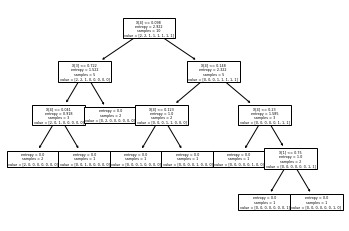

In [ ]:
tree.plot_tree(ArbolDecisionWine) 

##Test

In [ ]:
predWines = ArbolDecisionWine.predict(X_test)
print(predWines)

[120000 630000  50000 630000]


##Matriz de de confusion y metrica

In [ ]:
MatrizConfusionWine = confusion_matrix(y_test, predWines)
ExactitudWine = metrics.accuracy_score(y_test, predWines)


print('Matriz de Confusión')
print(MatrizConfusionWine)
print('Exactitud = ', ExactitudWine)


Matriz de Confusión
[[1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]
Exactitud =  0.25


##Grafica ROC

In [ ]:
knnwine = KNeighborsClassifier(n_neighbors=3)


knnwine.fit(X_train, y_train)
print('Exactitud de K-NN en la claificación de datos de entrenamiento: {:.2f}'
     .format(knnwine.score(X_train, y_train)))
print('Exactitud de K-NN en la clasifiación de datos de test: {:.2f}'
     .format(knnwine.score(X_test, y_test)))

pred = knnwine.predict(X_test)

Exactitud de K-NN en la claificación de datos de entrenamiento: 0.30
Exactitud de K-NN en la clasifiación de datos de test: 0.25


In [ ]:
def Curva_ROC(RFP, RVP,roc_auc):
    plt.figure(figsize=[7,7])
    plt.plot(RFP, RVP, color='darkorange')
    plt.plot([0,1], [0,1], linestyle=(0, (5, 5)), linewidth=2)
    plt.xlabel("1-Especificidad: 1 - VP/(VP+FN)")
    plt.ylabel("Sensibilidad: VP/(VP+FN)")
    plt.title("Curva ROC (Característica Operativa del Receptor)")
    

[[0.         1.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]]
[1.         0.         0.33333333 0.66666667]
área bajo la curva =  0.0


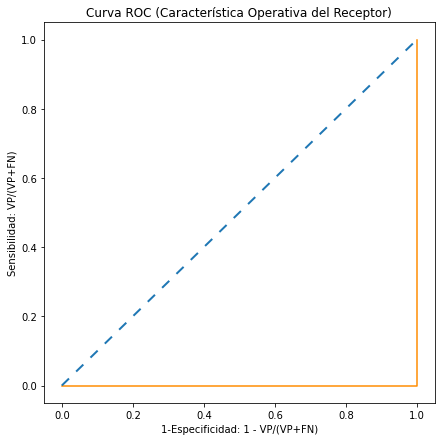

In [ ]:
import sklearn.metrics as metrics
probs = knnwine.predict_proba(X_test)
preds = probs[:,1]
RFP, RVP, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(RFP, RVP)
Curva_ROC(RFP,RVP,roc_auc)
print(probs)
print(preds)
print('área bajo la curva = ',roc_auc)